### Desafío - Random Forest
- Para realizar este desafío debes haber estudiado previamente todo el material
  disponibilizado correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los
  requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
  - El desafío se debe desarrollar de manera Individual.
  - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío Random Forest.

#### Requerimientos
- Para esta sesión trabajaremos con una base de datos sobre los precios de
  inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y
  contiene un gran número de atributos.
- Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios
  de inmuebles, medidos con la variable Sale_Price.
- A diferencia de otras sesiones donde implementamos el preprocesamiento a mano,
  ahora haremos uso de los archivos serializados en la sesión pasada.

#### Ejercicio 1: Preparación del ambiente de trabajo
- Importe las librerías clásicas a utilizar.
- Para este ejercicio Random Forest de Regresión.
- De manera adicional importe las funciones y clases necesarias para generar un
  desempeño de métricas en problemas de regresión.
- Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('Datasets/ames_housing.csv').drop('Unnamed: 0', axis=1)
df.sample(5, random_state = 15820)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
2675,One_and_Half_Story_Finished_All_Ages,Residential_Medium_Density,52,6240,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,Shed,400,9,2006,WD,Normal,114500,-93.623642,42.032299
649,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,75,9533,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,8,2009,ConLD,Normal,102900,-93.618607,42.034686
784,One_Story_1945_and_Older,Residential_Low_Density,0,12342,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,None,0,3,2009,WD,Normal,82500,-93.672157,42.024028
2448,Two_Story_1946_and_Newer,Residential_Low_Density,93,12090,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,7,2006,WD,Abnorml,258000,-93.650059,42.053466
229,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,20062,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,No_Fence,None,0,4,2010,WD,Normal,270000,-93.670114,42.030090


In [3]:
df.shape

(2930, 81)

#### Ejercicio 2: Importación de archivos serializados
- Importe su modelo entrenado y sus conjuntos de entrenamiento y validación
  serializados la sesión pasada y evalúe el desempeño del modelo de su compañero
  con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden
  ser los causantes.
- No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus
  métricas.
- Para importar un archivo seria

In [4]:
pickle_dms = pickle.load(open('archivos/model_dms_def.sav','rb'))
pickle_gr = pickle.load(open('archivos/gonzalo-rojas-actividad7.sav','rb'))
pickle_jg = pickle.load(open('archivos/jorge_guerrero _1.sav','rb'))
X_tra_pickle = pickle.load(open('archivos/X_train_dms.sav','rb'))
y_tra_pickle = pickle.load(open('archivos/y_train_dms.sav','rb'))
X_te_pickle = pickle.load(open('archivos/X_test_dms.sav','rb'))
y_te_pickle = pickle.load(open('archivos/y_test_dms.sav','rb'))

#pickle_dms_10 = pickle.load(open('archivos/model_dms_clr.sav','rb'))
X_tra_pickle_10 = pickle.load(open('archivos/X_train.sav','rb'))
#y_tra_pickle_10 = pickle.load(open('archivos/y_train.sav','rb'))
X_te_pickle_10 = pickle.load(open('archivos/X_test.sav','rb'))
#y_te_pickle_10 = pickle.load(open('archivos/y_test.sav','rb'))


In [5]:
y_hat_gr = pickle_gr.predict(X_te_pickle)

print(f'''Metricas modelo gonzalo rojas
MSE: {np.sqrt(mean_squared_error(y_te_pickle, y_hat_gr))}
MAE: {median_absolute_error(y_te_pickle, y_hat_gr)}
R2 Score: {r2_score(y_te_pickle, y_hat_gr)}''')

Metricas modelo gonzalo rojas
MSE: 86633.47994055772
MAE: 45000.0
R2 Score: -0.32055666271589933


In [7]:
X_te_pickle_10_drop = X_te_pickle_10.drop(columns = 'Sale_Price')

In [8]:
y_hat_jg = pickle_jg.predict(X_te_pickle_10_drop)

print(f'''Metricas modelo jorge guerrero
MSE: {np.sqrt(mean_squared_error(y_te_pickle, y_hat_jg))}
MAE: {median_absolute_error(y_te_pickle, y_hat_jg)}
R2 Score: {r2_score(y_te_pickle, y_hat_jg)}''')

Metricas modelo jorgue guerrero
MSE: 48931.46964710915
MAE: 18400.0
R2 Score: 0.5787285368468384


In [16]:
y_hat = pickle_dms.predict(X_te_pickle)

print(f'''Metricas que trae el modelo
MSE: {np.sqrt(mean_squared_error(y_te_pickle, y_hat))}
MAE: {median_absolute_error(y_te_pickle, y_hat)}
R2 Score: {r2_score(y_te_pickle, y_hat)}''')

Metricas que trae el modelo
MSE: 38235.962900732935
MAE: 15750.0
R2 Score: 0.7427652813516173


Podemos observar que al intentar predecir con el modelo de gonzalo rojas, con mis datos de entrenamiento y validacion, el modelo presenta un muy mal ajuste, y el modelo de jorge guerrero si ajusta mejor a mis datos de entrenamiento y validacion que el modelo de gonzalo rojas, ahora el modelo entrenado por mi pickle_dms se ajusta muy bien con los mismos datos de entrenamiento y validacion probados en los modelos de mis compañeros.

#### Ejercicio 3: Evaluación Random Forest
- En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando
  sklearn.ensemble.RandomForest sin modificar hiper parámetros, sólo declarando
  la semilla pseudoaleatoria.
- Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como
  con el de su compañero.

In [9]:
random_forest = RandomForestRegressor(random_state = 15820).fit(X_tra_pickle, y_tra_pickle)

In [10]:
y_hat_rf = random_forest.predict(X_te_pickle)

print(f'''Metricas modelo sin hiperparametros
MSE: {np.sqrt(mean_squared_error(y_te_pickle, y_hat_rf))}
MAE: {median_absolute_error(y_te_pickle, y_hat_rf)}
R2 Score: {r2_score(y_te_pickle, y_hat_rf)}''')

Metricas modelo sin hiperparametros
MSE: 27474.600281753395
MAE: 9846.600000000006
R2 Score: 0.8671846451990504


#### Ejercicio 4: Reporte las métricas de desempeño
- Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los
  siguientes hiper parámetros:
  - max_features: None, log2, sqrt.
  - n_estimators: Evaluar entre 20 y 1000 en pasos de 50.
- Guarde la tasa de error en la exactitud medida con OOB.
- Grafique el comportamiento.

In [11]:
# generamos una serie de listas para guardar los valores
tmp_oob_none, tmp_oob_sqrt,tmp_oob_log2 = [], [], []

n_estimators = range(20, 1000, 25)

# para cada rango de modelos estimados
for i in n_estimators:
    
    # Implementamos una variante con todos los atributos
    rf_none = RandomForestRegressor(n_estimators = i, max_features = None, oob_score = True, 
                            n_jobs = -1, random_state = 158).fit(X_tra_pickle, y_tra_pickle)
    # Implementamos una variante donde los atributos se escogen con sqrt
    rf_sqrt = RandomForestRegressor(n_estimators= i, max_features = "sqrt", warm_start = True, 
            n_jobs = -1, oob_score = True, random_state = 158).fit(X_tra_pickle, y_tra_pickle)
    # Implementamos una variante donde los atributos se escogen con log
    rf_log = RandomForestRegressor(n_estimators = i, max_features = "log2", warm_start = True, 
            n_jobs = -1, oob_score = True, random_state=158).fit(X_tra_pickle, y_tra_pickle)

    # Estimamos el error en OOB
    tmp_oob_none.append(1 - rf_none.oob_score_)
    tmp_oob_sqrt.append(1 - rf_sqrt.oob_score_)
    tmp_oob_log2.append(1 - rf_log.oob_score_)

<Figure size 864x288 with 0 Axes>

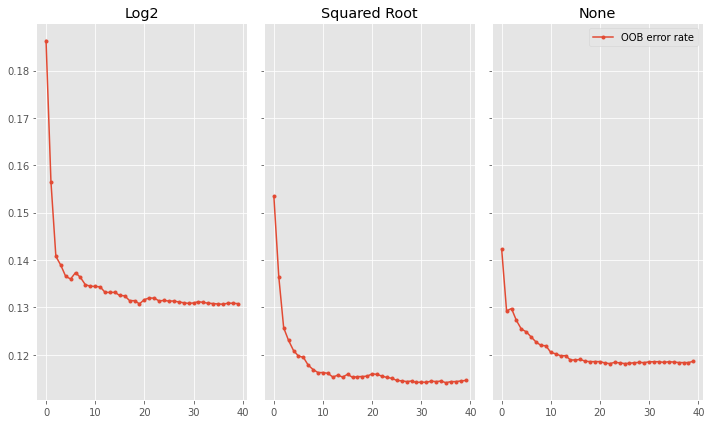

In [12]:
plt.figure(figsize = (12, 4))
fig, axs = plt.subplots(1, 3, sharex = True, sharey = True)
axs[0].plot(tmp_oob_log2, '.-', label = 'OOB error rate')
axs[0].set_title('Log2')
axs[1].plot(tmp_oob_sqrt,'.-', label = 'OOB error rate')
axs[1].set_title('Squared Root')
axs[2].plot(tmp_oob_none, '.-', label = 'OOB error rate')
axs[2].set_title('None')
plt.tight_layout()
plt.legend()

#### Ejercicio 5: Refactoriza el modelo
- En base a la mejor combinación de hiper parámetros, reentrene el modelo y comente
  su desempeño.

Segun el grafico podemos apreciar que el menor OOB ERROR es con max_features = None y el mejor estimador en n_estimators = 40

In [13]:
best_model_params = RandomForestRegressor(n_estimators = 40, max_features = None, warm_start = True, n_jobs = -1,
                                            oob_score = True, random_state = 15820).fit(X_tra_pickle, y_tra_pickle)

In [14]:
y_hat_best = best_model_params.predict(X_te_pickle)

print(f'''Metricas modelo refactorizado
MSE: {np.sqrt(mean_squared_error(y_te_pickle, y_hat_best))}
MAE: {median_absolute_error(y_te_pickle, y_hat_best)}
R2 Score: {r2_score(y_te_pickle, y_hat_best)}''')

Metricas modelo refactorizado
MSE: 27481.161645550634
MAE: 10079.299999999988
R2 Score: 0.8671212008606657


In [15]:
y_hat_rf = random_forest.predict(X_te_pickle)

print(f'''Metricas modelo sin hiperparametros
MSE: {np.sqrt(mean_squared_error(y_te_pickle, y_hat_rf))}
MAE: {median_absolute_error(y_te_pickle, y_hat_rf)}
R2 Score: {r2_score(y_te_pickle, y_hat_rf)}''')

Metricas modelo sin hiperparametros
MSE: 27474.600281753395
MAE: 9846.600000000006
R2 Score: 0.8671846451990504


In [17]:
y_hat = pickle_dms.predict(X_te_pickle)

print(f'''Metricas que trae el modelo
MSE: {np.sqrt(mean_squared_error(y_te_pickle, y_hat))}
MAE: {median_absolute_error(y_te_pickle, y_hat)}
R2 Score: {r2_score(y_te_pickle, y_hat)}''')

Metricas que trae el modelo
MSE: 38235.962900732935
MAE: 15750.0
R2 Score: 0.7427652813516173


Podemos observar que el modelo sin hiper parametros presenta el msimo ajuste versus el modelo con hiper parametros y que el modelo serializado como viene, presenta un ajuste mas bajo que los modelos sin hiper parametros y refactorizado

El modelo refactorizado presenta muy buenas metricas apesar de mantener el mismo ajust del modelo sin hiperparametros, podriamos quedarnos con el modelo refactorizado ya que por los procesos asociados al algortitmo de Random Forest, este evita el overfit manteniendo un buen ajuste.